<a href="https://colab.research.google.com/github/AndresMontesDeOca/TimeSeries/blob/main/AST_Clase_1_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 1</h3>
    <h5>Ejercicio 2</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

In [2]:
# rcParams['figure.figsize']= 14, 5
# rcParams['axes.spines.top']= False
# rcParams['axes.spines.right']= False
# rcParams['axes.prop_cycle']= cycler(color=['#101010'])
# rcParams['lines.linewidth']= 2

In [3]:
from IPython import display
# display.set_matplotlib_formats("svg")

**RUIDO BLANCO**

In [4]:
ruido_blanco = np.random.randn(1000)

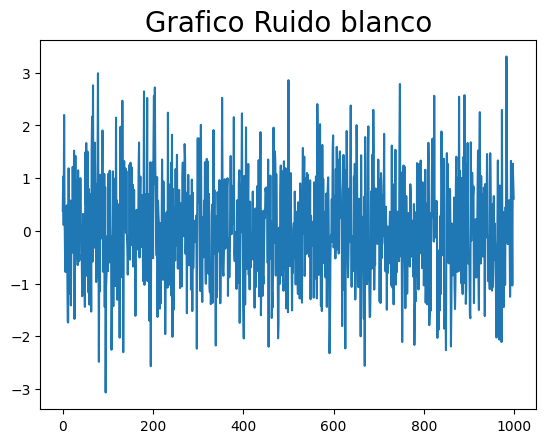

In [5]:
plt.title("Grafico Ruido blanco", size=20)
plt.plot(np.arange(len(ruido_blanco)),ruido_blanco)

In [6]:
# Funcion que calcula ambos Rolling Statistics (Mean and Desv)

def calculate_rolling_statitics (serie):
  RM = pd.Series(serie.rolling(window=12).mean(), name='RM')
  RSD = pd.Series(serie.rolling(window=12).std(), name='RSD')
  df = pd.concat([serie, RM, RSD], axis=1)
  return df

<Axes: >

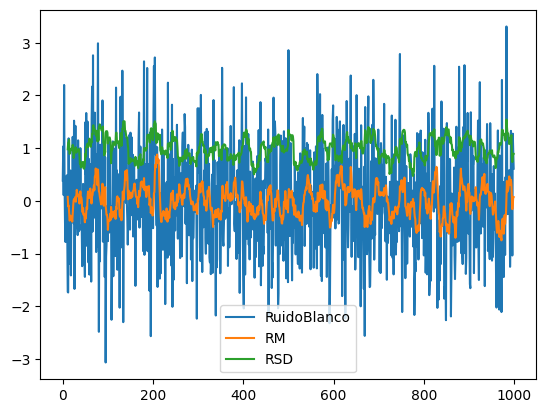

In [7]:
calculate_rolling_statitics(pd.Series(ruido_blanco, name='RuidoBlanco')).plot()

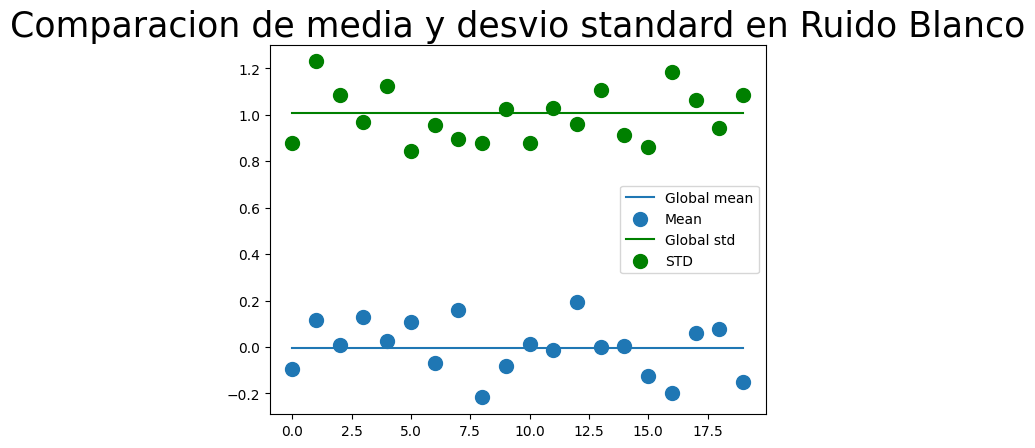

In [8]:
ruido_blanco_chunks = np.split(ruido_blanco, 20)
means, stds = [], []

for chunk in ruido_blanco_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))

plt.title('Comparacion de media y desvio standard en Ruido Blanco', size=25)
plt.plot(np.arange(len(means)), [ruido_blanco.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [ruido_blanco.std()] * len(stds), label='Global std', lw=1.5, color='green')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', s=100, color='green')
plt.legend();

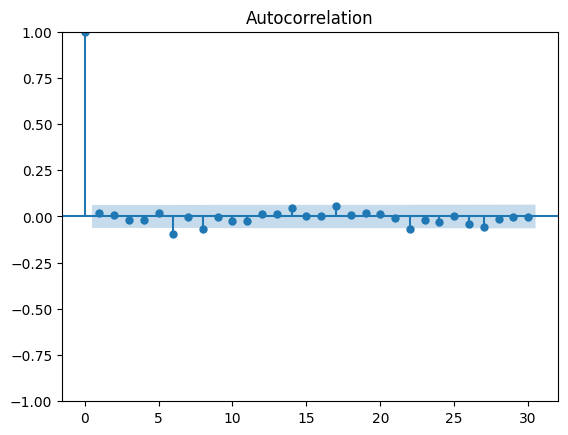

In [9]:
plot_acf(np.array(ruido_blanco));

Camino aleatorio

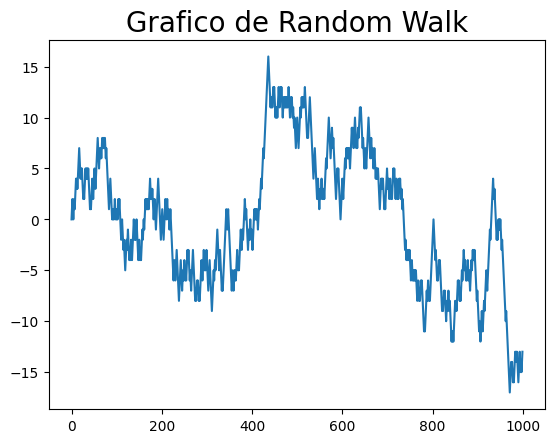

In [10]:
random_walk = [0]

for i in range(1,1000):
  num= -1 if np.random.random() < 0.5 else 1
  random_walk.append(random_walk[-1] + num)

plt.title('Grafico de Random Walk', size=20)
plt.plot(np.arange(len(random_walk)), random_walk);

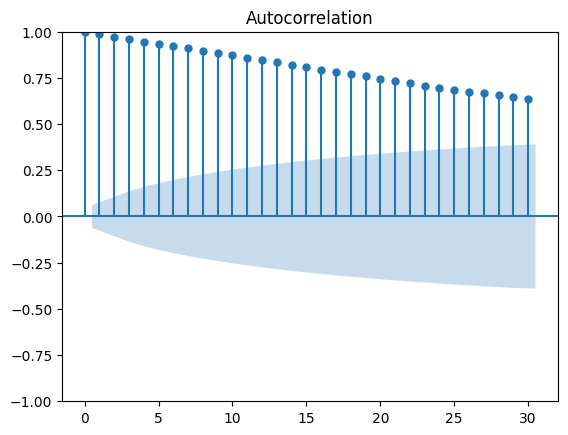

In [11]:
plot_acf(np.array(random_walk));

In [12]:
s_random_walk = pd.Series(random_walk)
s_random_walk_diff = s_random_walk.diff().dropna()

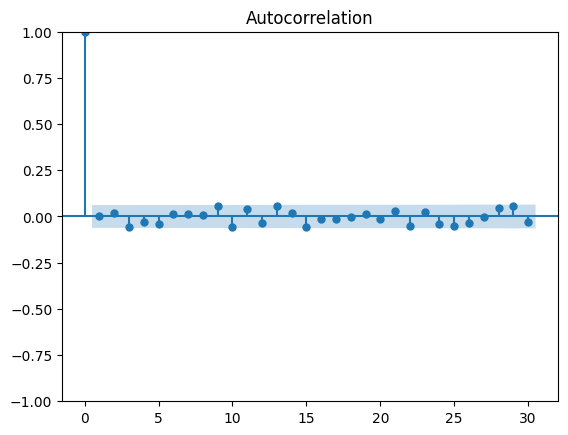

In [13]:
plot_acf(np.array(s_random_walk_diff));

Datos históricos del mercado

https://pypi.org/project/yfinance/

In [14]:
  !pip install yfinance
  !pip install mplfinance

In [15]:
from datetime import datetime
import yfinance as yf
import mplfinance as mpf
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
data = yf.download('MSFT', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [16]:
data2 = data["Open"]

<Axes: xlabel='Date'>

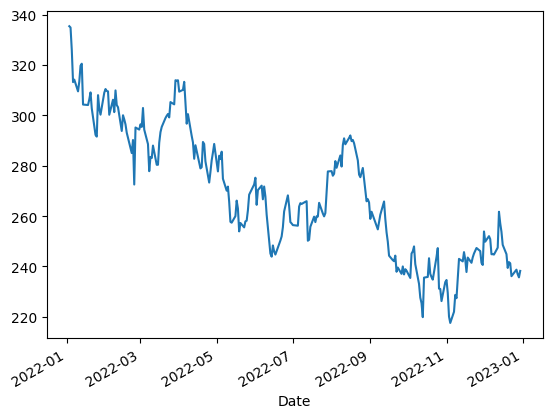

In [17]:
data2.plot()

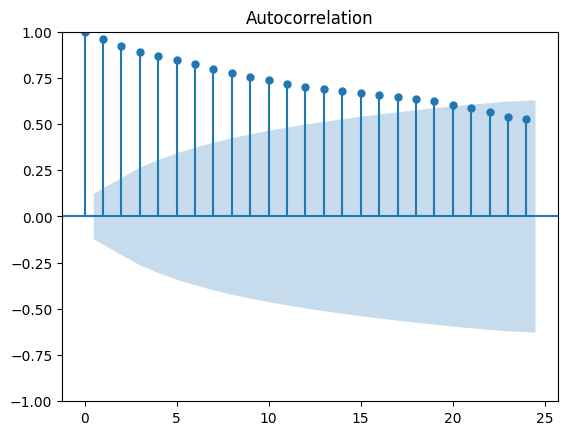

In [18]:
plot_acf(np.array(data2));

In [19]:
s_data2 = pd.Series(data2)
s_data2_diff = s_data2.diff().dropna()

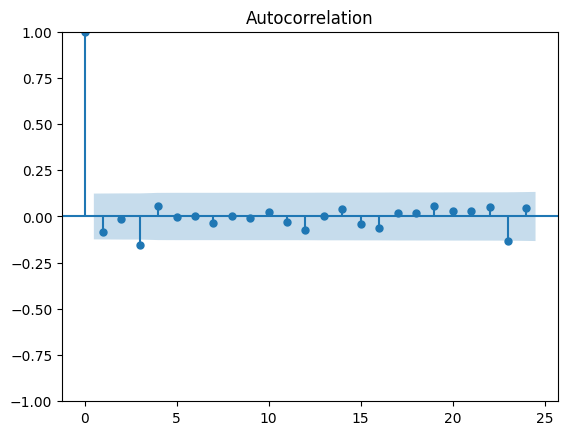

In [20]:
plot_acf(np.array(s_data2_diff));

<body>
  <h1> Fin ejercicio! </h1>
</body>

In [21]:
data2.head()

Date
2022-01-03    335.350006
2022-01-04    334.829987
2022-01-05    325.859985
2022-01-06    313.149994
2022-01-07    314.149994
Name: Open, dtype: float64

In [22]:
data2.diff().head()

Date
2022-01-03          NaN
2022-01-04    -0.520020
2022-01-05    -8.970001
2022-01-06   -12.709991
2022-01-07     1.000000
Name: Open, dtype: float64